<a href="https://colab.research.google.com/github/Pxtri2156/Project-machine-learning/blob/master/Fruit_Recognition_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Package**

In [1]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)



Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Xử lí data**

## **Đổi tên file** 

In [5]:
# Đổi tên file 
def Rename_File(path):
  
  for folder_name in os.listdir(path):
    print('folder',folder_name)
    path_1 = path + '/' + folder_name 
    i = 0
    for file_name in os.listdir(path_1):
      index = ''
      if i // 1000 != 0:
        index = str(i) 
      elif i // 100 != 0:
        index = '0'+str(i) 
      elif i // 10 != 0 :
        index = '00'+str(i)
      else:
        index = '000' + str(i)
      t1 = path_1 + '/' + file_name
      t2 = path_1 + '/' + folder_name + index + '.jpg'
      #print('t2',t2)
      i += 1
      os.rename(t1,t2)
  print("Done")


In [ ]:
Rename_File('/content/drive/My Drive/Train Dataset')

In [ ]:
Rename_File('/content/drive/My Drive/Data')

In [11]:
# count the number of files in a directory  
def Number_Of_file(path):
  for folder_name in os.listdir(path):

    path_1 = path + '/' + folder_name 
    count  = 0
    for file_name in os.listdir(path_1):
      count += 1
    print("The number of file in folder {f} : {c}".format(f = folder_name,c = count))
  

In [12]:
# Training set
path = '/content/drive/My Drive/Train Dataset'
Number_Of_file(path)

The number of file in folder Orange : 1038
The number of file in folder Avocado : 1262
The number of file in folder Apple : 902
The number of file in folder Start_Fruit : 941
The number of file in folder Dragon_Fruit : 356
The number of file in folder Mango : 764
The number of file in folder Guava : 697
The number of file in folder Watermelon : 710
The number of file in folder Custard : 837
The number of file in folder Banana : 1160
The number of file in folder Plum : 1149
The number of file in folder Coconut : 1055


In [13]:
# Test set 
path = '/content/drive/My Drive/Data'
Number_Of_file(path)

The number of file in folder Apple : 219
The number of file in folder Avocado : 420
The number of file in folder Banana : 2
The number of file in folder Guava : 402
The number of file in folder Plum : 534
The number of file in folder Orange : 650
The number of file in folder Custard : 405
The number of file in folder Coconut : 330
The number of file in folder Start_fruit : 434
The number of file in folder Watermelon : 452
The number of file in folder Mango : 402
The number of file in folder Dragon_Fruit : 390


In [ ]:
# Doi ten cho Tony Nhat 
# Đổi tên file 
def Rename_File_Dragon(path):
  i = 0
  for file_name in os.listdir(path):
    index = ''
    if i // 1000 != 0:
      index = str(i) 
    elif i // 100 != 0:
      index = '0'+str(i) 
    elif i // 10 != 0 :
      index = '00'+str(i)
    else:
      index = '000' + str(i)
    t1 = path + '/' + file_name
    t2 = path + '/' + "Dragon_Fruit" + index + '.jpg'
    i += 1
    os.rename(t1,t2)
  print("Done")


## **Crop_Region_Interest**

In [ ]:
def Crop_Region_Interest(path):
  img = cv2.imread(path,cv2.IMREAD_COLOR)

  cv2_imshow(img)

  #0 noise reduction
  img = np.copy(img) # we don't modify the original image
  img[:,:,0] = cv2.GaussianBlur(img[:,:,0], ksize=(7,7), sigmaX=4, sigmaY=4)
  img[:,:,1] = cv2.GaussianBlur(img[:,:,1], ksize=(7,7), sigmaX=4, sigmaY=4)
  img[:,:,2] = cv2.GaussianBlur(img[:,:,2], ksize=(7,7), sigmaX=4, sigmaY=4)

  #1.The input fruit image is converted to HSV colour space
  img_HSV = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
  img_HSV = img_HSV[:,:,1:2]
  #cv2_imshow(img_HSV)

  #2.Perform thresholding operation on the S component, since S is much less sensitive to lighting variation.
  ret, binary_img = cv2.threshold(img_HSV,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU )
  
  #3. Close small holes using the Closing morphological operator with a disk structuring element.
  #cv2_imshow(binary_img)
  kernel = np.ones((5,5),np.uint8)
  #binary_img = cv2.dilate(binary_img,kernel,iterations = 2)
  opening_img = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)
  closing_img = cv2.morphologyEx(opening_img, cv2.MORPH_CLOSE, kernel)

  #4. Find the area of the Region of Interest from the binary image.
  contours, hierarchy = cv2.findContours(closing_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  print(contours)
  #cv2.drawContours(img, contours, -1, (0,255,0), 3)
  
  #5. Crop the Region of Interest and replace the binary values with the original pixel intensity.
  print('\n')
  cnt = contours[0]
  x,y,w,h = cv2.boundingRect(cnt)
  print('X,Y,W,H',x,y,w,h)
  #cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  img_crop = img[y-50:(y+h+50),x-50:(x+w+50),:]
  
  cv2_imshow(closing_img)
  #cv2_imshow(img)
  cv2_imshow(img_crop)
  
  '''
  choose = int(input("DO YOU WANT CROP PICTURE: 1-YES, 0-NO ?"))
  if choose == 0:
    # rename
  else:
    # Crop picture
    cv2.imwrite(path,img_crop) 
  #pass '''


*Note: Hàm vẫn chưa hoàn thiện nên fail rất nhiều*

In [ ]:
path = '/content/drive/My Drive/Region_Test/Copy of IMG_5376.JPG'
Crop_Region_Interest(path)

In [ ]:
img.shape

(854, 480, 3)

In [ ]:
test = cv2.imread('/content/drive/My Drive/Datasets/Apple/output1/Apple_fruit001.jpg')


In [ ]:
if test.shape != (480,854,3): 
  print("No")
else: 
  print("Yes")

Yes


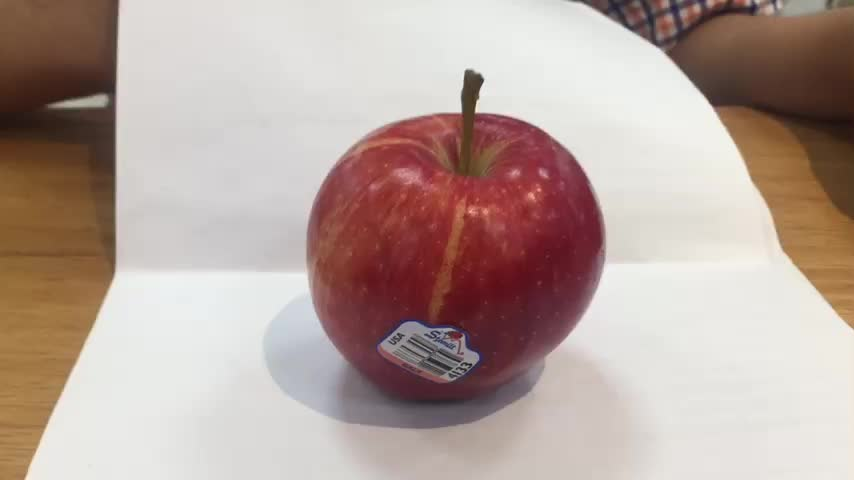

In [ ]:
cv2_imshow(test)

In [ ]:
test_path = '/content/drive/My Drive/Datasets'
for filename_0 in os.listdir(test_path):
  print('filename 0 ',filename_0)
  

filename 0  Start_Fruit
filename 0  Dragon_Fruit
filename 0  Apple
filename 0  Mango
filename 0  Avocado
filename 0  Peach
filename 0  Custard
filename 0  Orange
filename 0  Coconut
filename 0  Guava
filename 0  Watermelon
filename 0  Banana
filename 0  Plum


## **Load ảnh** : 

In [ ]:
test_path = '/content/drive/My Drive/Datasets'


for filename_0 in os.listdir(test_path):
  #print('filename 0 ',filename_0)
  temp_path_0 = ''
  temp_path_0 = test_path + '/'+filename_0
  #print('temp_path_0',temp_path_0)
  for filename_1 in os.listdir(temp_path_0 ):
    #print('temp_path_0',temp_path_0)
    temp_path_1 = ''
    temp_path_1 = temp_path_0 + '/'+filename_1
    for filename_2 in os.listdir(temp_path_1 ):
      temp_path_2 = ''
      temp_path_2 = temp_path_1 + '/'+filename_2
      img = cv2.imread(temp_path_2)
      if  img.shape != (480,854,3):
        print("Noise", img.shape) 

In [ ]:
a = "pham/xuan"
b = os.path.join(a,'tri')
print(b)

pham/xuan/tri


In [ ]:
# Processing training data
# -> appending images in a list 'train_images'
# -> appending labels in a list 'train_labels'

train_images = []       
train_labels = []
shape = (200,200) #Quy định kích thước  
train_path = '/content/drive/My Drive/My_Data/Fruit/Data_of_Fruit/train_zip/train'

for filename in os.listdir('/content/drive/My Drive/My_Data/Fruit/Data_of_Fruit/train_zip/train'):
  #print(filename)
  if filename.split('.')[1] == 'jpg':

    img = cv2.imread(os.path.join(train_path,filename)) # == train_path + '/'+file_name
        
    # Spliting file names and storing the labels for image in list
    train_labels.append(filename.split('_')[0])
        
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
        
    train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
print(y_train.shape)
print(y_val.shape)
print(x_train.shape)
print(x_val.shape)

(180, 4)
(60, 4)
(180, 200, 200, 3)
(60, 200, 200, 3)


In [ ]:
print(y_train[0])
print(x_train[0][0][0])

[1 0 0 0]
[255 255 255]


In [ ]:
# Processing testing data
# -> appending images in a list 'test_images'
# -> appending labels in a list 'test_labels'
# The test data contains labels as well also we are appending it to a list but we are'nt going to use it while training.

test_images = []
test_labels = []
shape = (200,200)
test_path = '/content/drive/My Drive/My_Data/Fruit/Data_of_Fruit/test_zip/test'

for filename in os.listdir(test_path):
  #print(filename)
  if filename.split('.')[1] == 'jpg':
    img = cv2.imread(os.path.join(test_path,filename))
    #print(img)    
    # Spliting file names and storing the labels for image in list
    test_labels.append(filename.split('_')[0])
        
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
    #print(img) 
    test_images.append(img)
#print(test_images[0])
        
# Converting test_images to array
test_images = np.array(test_images)



[1 0 0 0]


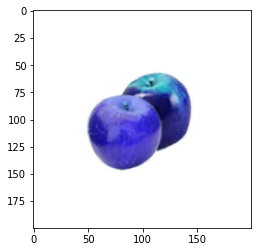

In [ ]:
# Visualizing Training data
print(train_labels[0])
plt.imshow(train_images[0])

[0 1 0 0]


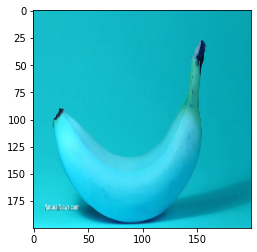

In [ ]:
# Visualizing Training data
print(train_labels[100])
plt.imshow(train_images[100])

In [ ]:
# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=
                 30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

# Hàm mất mát giống hàm cross entropy

In [ ]:
# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 196, 196, 30)      8670      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 30)        8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 63480)            

In [ ]:
# Training the model
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Train on 180 samples, validate on 60 samples
Epoch 1/50
180/180 [==============================] - 9s 48ms/step - loss: 2.6172 - acc: 0.2889 - val_loss: 5.9600 - val_acc: 0.3667
Epoch 2/50
180/180 [==============================] - 1s 3ms/step - loss: 2.7499 - acc: 0.4611 - val_loss: 1.5705 - val_acc: 0.4500
Epoch 3/50
180/180 [==============================] - 0s 3ms/step - loss: 1.3080 - acc: 0.5667 - val_loss: 0.8546 - val_acc: 0.7000
Epoch 4/50
180/180 [==============================] - 1s 3ms/step - loss: 0.8054 - acc: 0.6889 - val_loss: 0.8156 - val_acc: 0.6167
Epoch 5/50
180/180 [==============================] - 1s 3ms/step - loss: 0.7499 - acc: 0.7111 - val_loss: 0.6226 - val_acc: 0.7833
Epoch 6/50
180/180 [==============================] - 1s 3ms/step - loss: 0.6107 - acc: 0.8000 - val_loss: 0.6576 - val_acc: 0.7667
Epoch 7/50
180/180 [==============================] - 1s 3ms/step - loss: 0.5571 - acc: 0.7778 - val_loss: 0.6371 - val_acc: 0.7833
Epoch 8/50
180/180 [==========

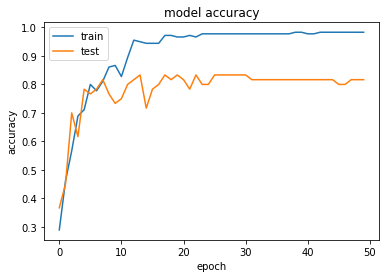

In [ ]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

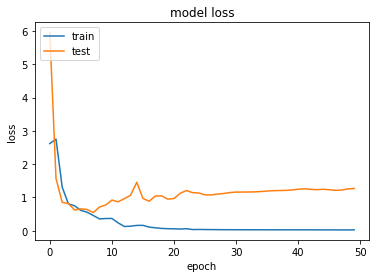

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Evaluating model on validation data
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

60/60 [==============================] - 0s 8ms/step
[1.2702135801315309, 0.8166666626930237]


In [ ]:
# Testing predictions and the actual label
checkImage = test_images[2:3]
checklabel = test_labels[2:3]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

#print(test_images[0:1])
#print(test_labels[0:1])
print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  ['apple']
Predicted :-  apple


In [ ]:
Test_images = []
Test_labels = []
shape = (200,200)
Test_path = '/content/drive/My Drive/Data/Fruit/Test_data'

for filename in os.listdir(Test_path):
  print(filename)
  if filename.split('.')[1] == 'jpg':
    img = cv2.imread(os.path.join(Test_path,filename))
    #print(img)    
    # Spliting file names and storing the labels for image in list
    #Test_labels.append(filename.split('_')[0])
        
    # Resize all images to a specific shape
    img = cv2.resize(img,shape)
    #print(img) 
    Test_images.append(img)
#print(test_images[0])
Test_labels  = [0,0,1,1,1,1,1,1,1,1,1]       
# Converting test_images to array
Test_images = np.array(Test_images)

apple_01 (1).jpg
banana_01.jpg
apple_01.jpg
banana_02.jpg
banana_03.jpg
banana_04.jpg
banana_05.jpg
banana_06.jpg
banana_07.jpg
banana_08.jpg
banana_09.jpg


In [ ]:
Check_image = Test_images[2:3]
Check_label = Test_labels[2:3]

predict = model.predict(np.array(Check_image))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print(predict)
print("Actual :- ",Check_label)
print("Predicted :- ",output[np.argmax(predict)])

[[1.9711511e-02 9.7973287e-01 8.8944532e-09 5.5556954e-04]]
Actual :-  [1]
Predicted :-  banana
